In [94]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.patches as patches

analyzer = plots.DataAnalyser()

# def r2(x,y):
#     # Linear regression (1st-degree polynomial)
#     coeffs = np.polyfit(x, y, 1)
#     y_pred = np.polyval(coeffs, x)


#     # R-squared calculation
#     ss_res = np.sum((y - y_pred)**2)
#     ss_tot = np.sum((y - np.mean(y))**2)
#     r_squared = 1 - (ss_res / ss_tot)

#     r_squared_2 = r2_score(y, y_pred)

#     if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

#     # Print R²
#     print(f"R²: {r_squared:.4f}")

def r2(x,y,deg):
    # Linear regression (1st-degree polynomial)
    coeffs = np.polyfit(x, y, deg)
    model = np.poly1d(coeffs)
    y_pred = model(x)


    # R-squared calculation
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    r_squared_2 = r2_score(y, y_pred)

    if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

    # Print R²
    print(f"R²: {r_squared:.4f}")
    return model



In [95]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
path = 'dataset_metadata_official.csv'
df_total = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_total[(df_total['mpc_success'] == True) & (df_total['mpc_RMSe'] <= 0.5) & (df_total['nn_success'] == True)]
print('len reasonable', len(df_reasonable))
df_reasonable.groupby('trajectory_type').count()

len reasonable 65


,sim_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,mpc_execution_time (s),...,period (s),inter_position_RMSe,RMSe_u0,RMSe_u1,RMSe_u2,RMSe_u3,RMSe_u4,RMSe_u5,RMSe_u6,RMSe_u7
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
circle_xz,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
line,19,19,19,19,19,19,19,19,19,19,...,0,19,19,19,19,19,19,19,19,19
lissajous_xy,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [96]:
df_reasonable.sort_values('nn_execution_time (s)', ascending=False)[['sim_id','trajectory_type', 'nn_execution_time (s)']]
df_reasonable.sort_values('nn_RMSe', ascending=True)[['sim_id','trajectory_type', 'nn_RMSe']]

,sim_id,trajectory_type,nn_RMSe
94,23,lissajous_xy,0.065126
88,16,lissajous_xy,0.073348
82,9,lissajous_xy,0.088287
95,24,lissajous_xy,0.091482
89,17,lissajous_xy,0.117329
...,...,...,...
126,27,line,0.494532
130,31,line,0.507313
177,38,circle_xy,0.507504
70,7,circle_xz,0.516662


percentile 2 (0.95) = 0.5075039753004983


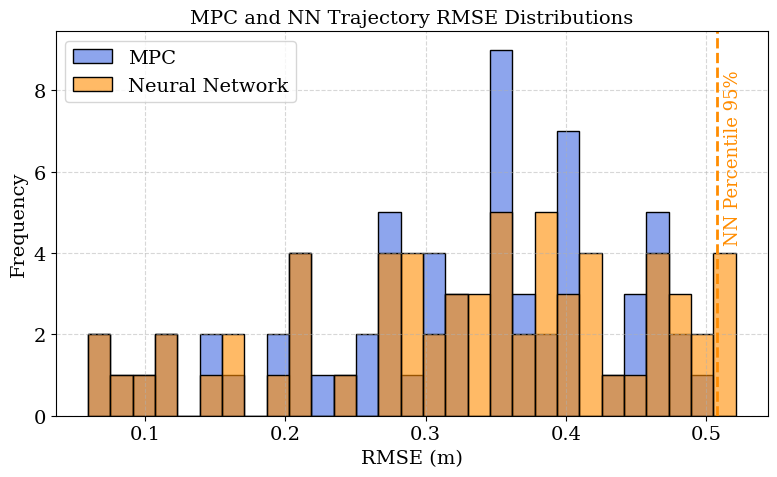

In [97]:
analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trajectory_rmse.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


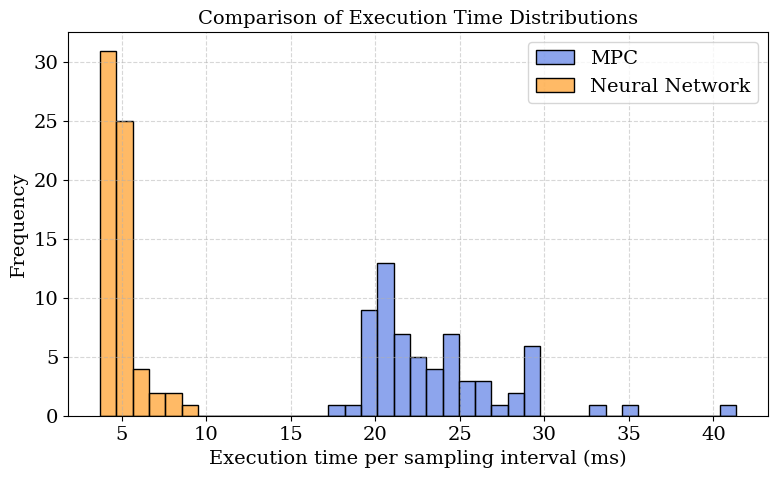

In [98]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=40)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [99]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.059345,0.496112,0.314924,0.114516
1,Neural Network,0.065126,0.520974,0.333001,0.122307


In [100]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.017538,0.041351,0.023621,0.004318
1,Neural Network,0.003715,0.008716,0.004960,0.001023


C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\991164806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\991164806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)


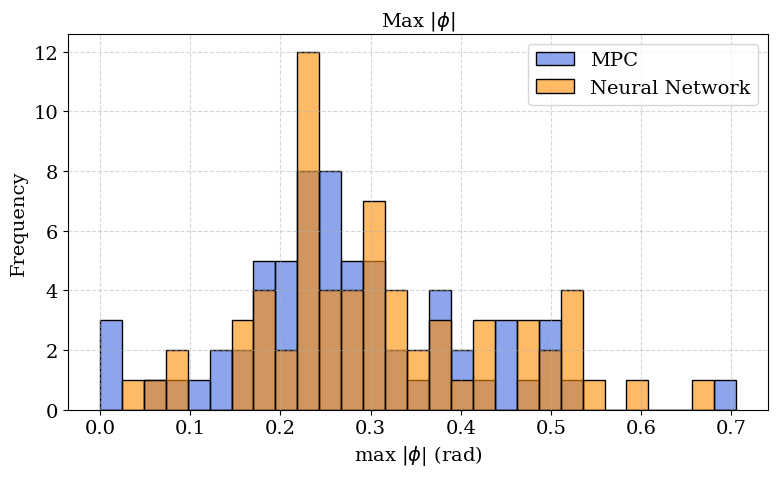

In [101]:
df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [102]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi (rad)')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.863060e-08,0.705262,0.224519,0.129138
1,Neural Network,4.554505e-02,0.679987,0.253867,0.134450


C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\269989624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\269989624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)


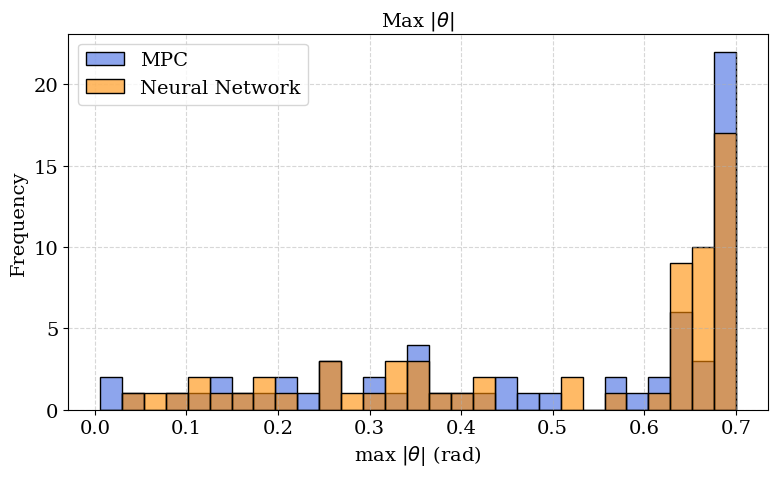

In [103]:
df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\571555454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\571555454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)


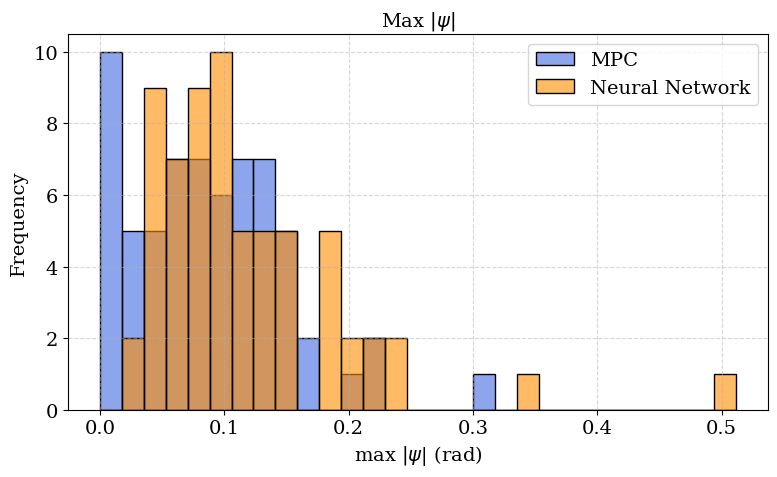

In [104]:
df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [105]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [106]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

percentile 0.95 = 0.21587987250809


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


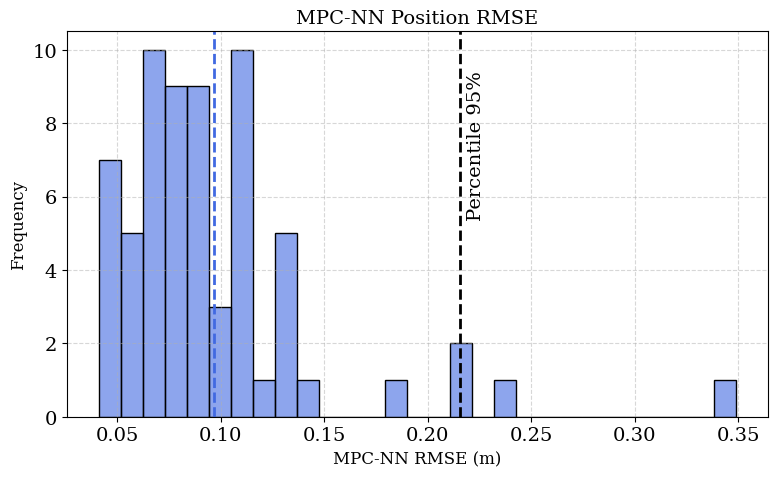

In [107]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95, save_name='inter-rmse.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\1614591183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


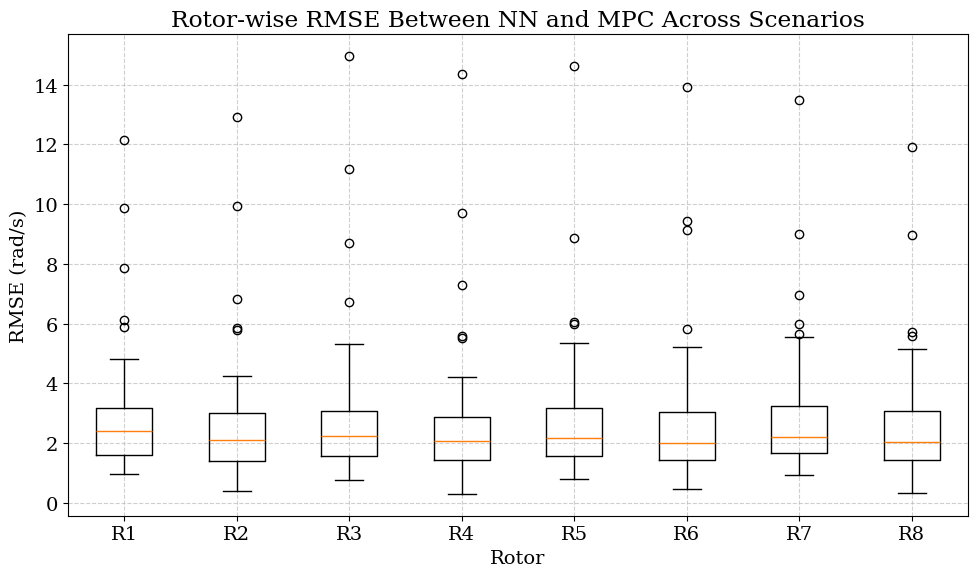

In [108]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots.pdf')
plt.show()

In [109]:
df_reasonable[df_reasonable['RMSe_u0'] > 4][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
70,0.440967,0.516662
73,0.319212,0.353242
109,0.203797,0.279695
115,0.214389,0.355044
121,0.250166,0.288902
128,0.327255,0.457485
130,0.353991,0.507313


In [110]:
df_reasonable.groupby('trajectory_type').size()

trajectory_type
circle_xy       26
circle_xz        2
line            19
lissajous_xy    18
dtype: int64

In [111]:
# 01/07/2025 - Same dataset for normal and single-rotor failures
# Load the dataset
df_total = pd.read_csv('dataset_metadata_25-07-21.csv')
#df_total = pd.read_csv('temp-delete.csv')
df_total = df_total[~df_total['trajectory_type'].str.contains('#')] #TODO: descomentar
df_total['global_id'] = df_total['trajectory_type'] + df_total['trajectory_id'].astype(str)
df_total[(df_total['mpc_success'] == True)]
df_total['perc_diff'] = (df_total['nn_RMSe'] - df_total['mpc_RMSe']) / df_total['mpc_RMSe']
df_total['nn_max_abs_phi'] = np.max(np.abs(df_total[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_total['mpc_max_abs_phi'] = np.max(np.abs(df_total[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df_total['nn_max_abs_theta'] = np.max(np.abs(df_total[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_total['mpc_max_abs_theta'] = np.max(np.abs(df_total[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df_total['nn_max_abs_psi'] = np.max(np.abs(df_total[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_total['mpc_max_abs_psi'] = np.max(np.abs(df_total[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)
df_total['delta_rmse'] = df_total['nn_RMSe'] - df_total['mpc_RMSe']
#df_total = df_total[~((df_total['trajectory_type'].str.contains('lissajous_xy')) & (df_total['radius (m)'] <= 1.5))] # TODO: deletar
# Split into normal and rotor failure datasets
df_normal = df_total[df_total['operation_mode'] == 'normal']
df_rotor_failure = df_total[df_total['operation_mode'] == 'total_failure']


In [112]:
# Filters - RMSe < 0.5 para operação normal. O dataset com rotor failure deve ser filtrado para conter as mesmas trajetórias que o normal

df_normal = df_normal[df_normal['mpc_RMSe'] < 0.7]
#df_normal = df_normal[df_normal['trajectory_type'] != 'line']
#df_normal = df_normal[df_normal['perc_diff'] >-0.4]


df_rotor_failure = df_rotor_failure[df_rotor_failure['global_id'].isin(df_normal['global_id'])]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 0.75]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['perc_diff'] > -0.3]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] < 1.2]
df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] <= 2.5] # TODO: TEMP DELETE
df_normal = df_normal[df_normal['global_id'].isin(df_rotor_failure['global_id'])]


# print('len df_normal',len(df_normal), 'len df_rotor_failure', len(df_rotor_failure))


485
len 485


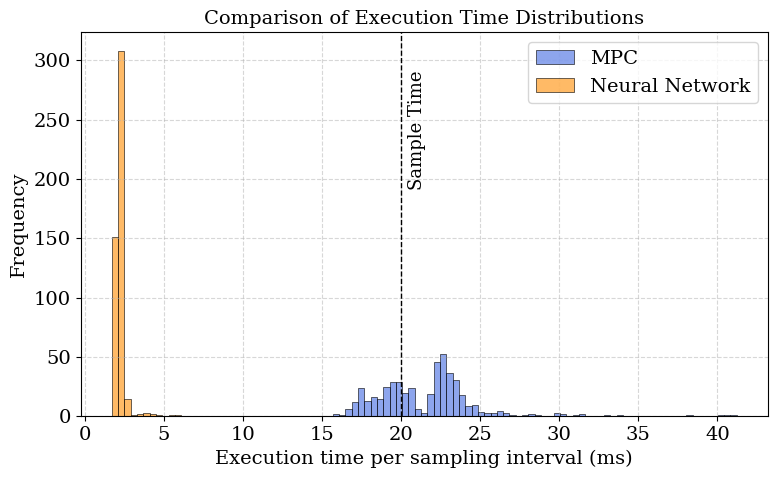

In [113]:
df_total['mpc_ex_time_per_cycle'] = df_total['mpc_execution_time (s)']/df_total['num_iterations']
df_total['nn_ex_time_per_cycle'] = df_total['nn_execution_time (s)']/df_total['num_iterations']

df_exec_time = df_total[(df_total['mpc_ex_time_per_cycle'] < 45e-3) & (df_total['nn_ex_time_per_cycle'] > 0.5e-3)]
print(len(df_exec_time))
print('len',len(df_exec_time))
#analyzer.plot_histogram(df_total, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=150)
analyzer.plot_histogram(df_exec_time, 'mpc_ex_time_per_cycle', 'nn_ex_time_per_cycle', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=100)

In [114]:
analyzer.stats_simulations(df_exec_time, 'mpc_ex_time_per_cycle','nn_ex_time_per_cycle')

,Controller,min,max,mean,std
0,MPC,0.01593,0.041223,0.021605,0.003259
1,Neural Network,0.00170,0.005929,0.002221,0.000358


In [115]:
# Groupby
df_normal.groupby('trajectory_type')['N'].count()

trajectory_type
circle_xy       33
line            74
lissajous_xy    73
Name: N, dtype: int64

percentile 2 (0.95) = 0.6353112540953848


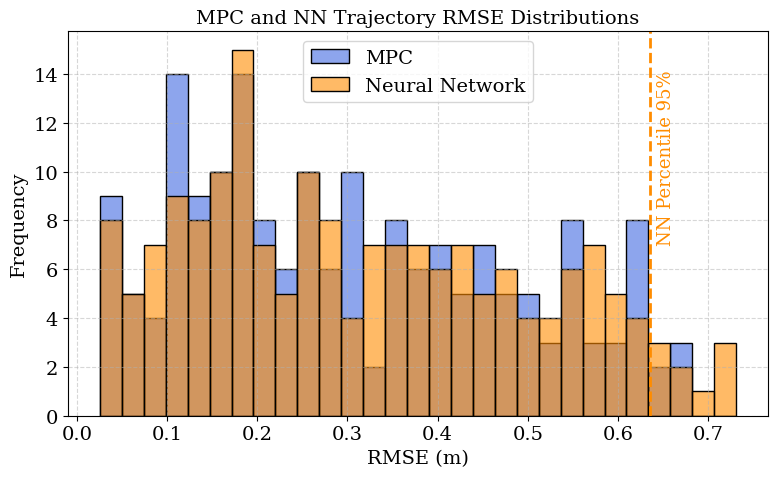

In [116]:
analyzer.plot_histogram(df_normal, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_normal.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)

In [117]:
stats_rmse = analyzer.stats_simulations(df_normal, 'mpc_RMSe', 'nn_RMSe')
print('Normal Trajectory RMSE stats')
stats_rmse

Normal Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.025455,0.672643,0.303497,0.178567
1,Neural Network,0.043903,0.730924,0.318124,0.184274


123       circle_xy
79        circle_xy
125       circle_xy
121       circle_xy
101       circle_xy
           ...     
259    lissajous_xy
261    lissajous_xy
275    lissajous_xy
175    lissajous_xy
245    lissajous_xy
Name: trajectory_type, Length: 180, dtype: object
percentile 1 (0.95) = 0.9471125996758786
percentile 2 (0.95) = 0.7139188326384764


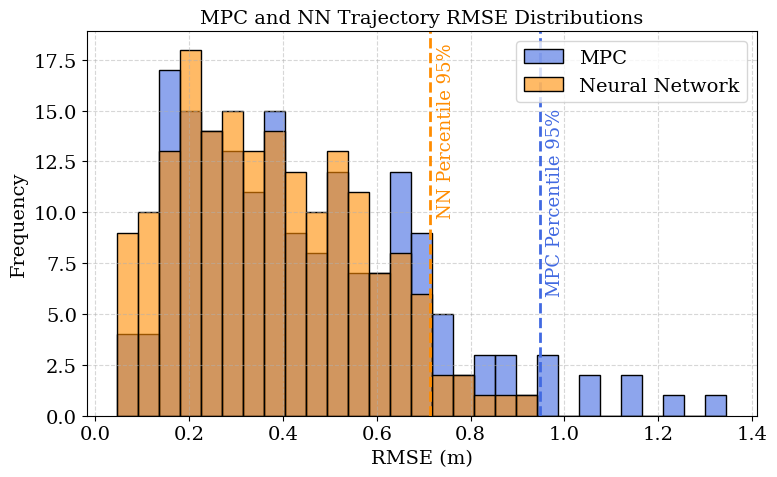

In [118]:
print(df_rotor_failure.sort_values('mpc_RMSe', ascending=False)['trajectory_type'])
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 2] # Offset, pode tirar
analyzer.plot_histogram(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_1rf.pdf', percentile_1=0.95,percentile_2=0.95, stat='count', show_mean=False, num_bins = 30, y_text_1_frac=0.8,y_text_2_frac=0.97)

In [119]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe')
print('Single Rotor Failure Trajectory RMSE stats')
stats_rmse

Single Rotor Failure Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.046572,1.344652,0.446611,0.254988
1,Neural Network,0.063608,0.899939,0.372707,0.194121


C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\140862616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


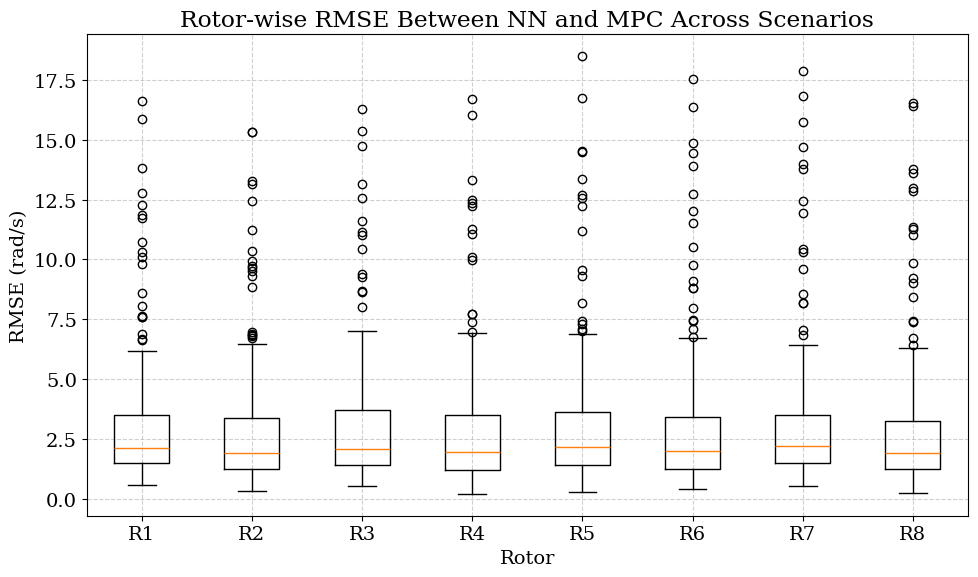

In [120]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_normal.pdf')
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\241932331.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


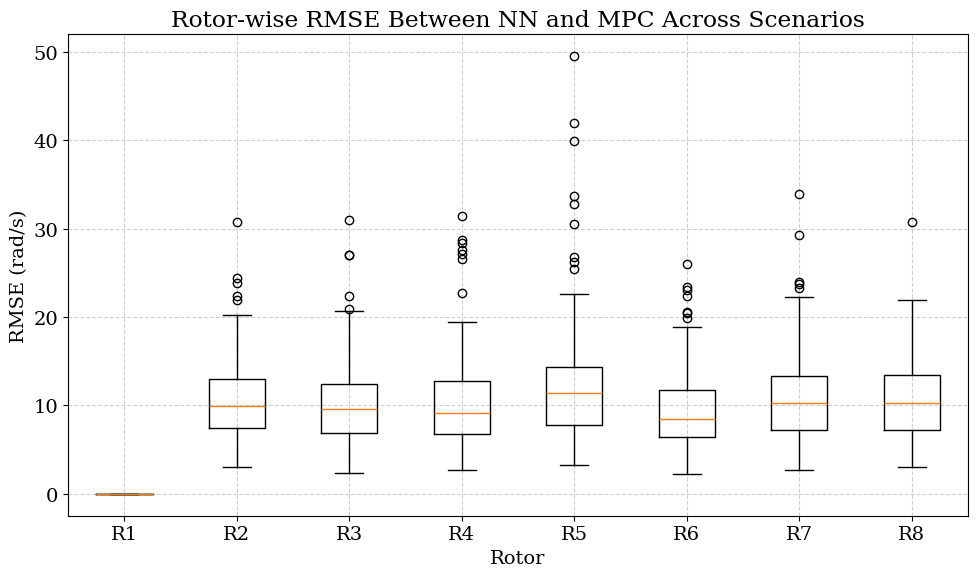

In [121]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_1rf.pdf')
plt.show()

percentile 0.95 = 0.2864718382064691


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


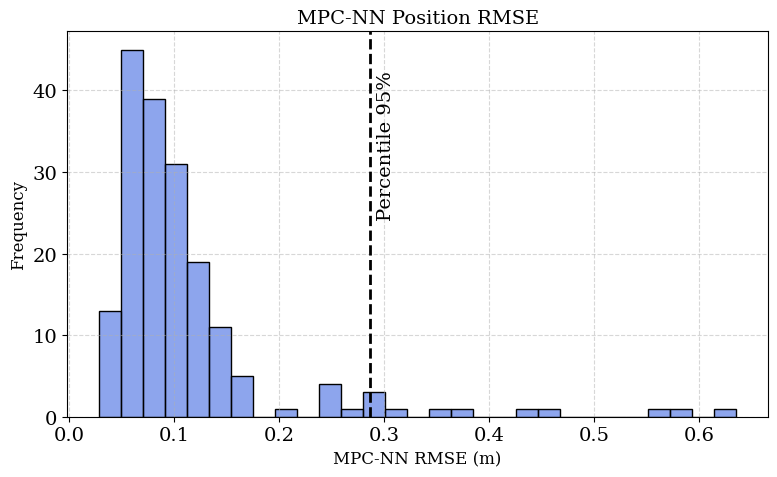

In [122]:
analyzer.plot_histogram_temp(df_normal, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_normal.pdf')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\3636185126.py:1: SyntaxWarning: invalid escape sequence '\D'
  analyzer.plot_histogram_temp(df_normal, 'delta_rmse', '$\\Delta$RMSE (m)', '$\Delta$RMSE Distribution', percentile=0.95,show_mean=False,save_name='delta_rmse_normal.pdf')
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with label

percentile 0.95 = 0.0623784441583794


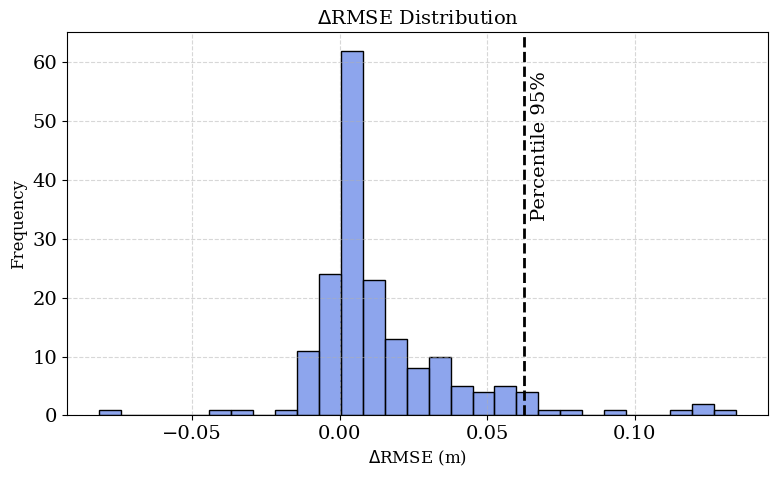

420   -0.081501
384   -0.036876
434   -0.034337
198   -0.019659
442   -0.013785
         ...   
368    0.092919
336    0.115170
462    0.124625
358    0.125907
348    0.134355
Name: delta_rmse, Length: 180, dtype: float64

In [123]:
analyzer.plot_histogram_temp(df_normal, 'delta_rmse', '$\\Delta$RMSE (m)', '$\Delta$RMSE Distribution', percentile=0.95,show_mean=False,save_name='delta_rmse_normal.pdf')
df_normal.sort_values('delta_rmse',ascending=True)['delta_rmse']

In [124]:
stats_rmse = analyzer.stats_simulations(df_normal, 'delta_rmse','delta_rmse')
stats_rmse

,Controller,min,max,mean,std
0,MPC,-0.081501,0.134355,0.014628,0.026994
1,Neural Network,-0.081501,0.134355,0.014628,0.026994


In [125]:
stats_rmse = analyzer.stats_simulations(df_normal, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.02832,0.634984,0.111879,0.092652
1,Neural Network,0.02832,0.634984,0.111879,0.092652


percentile 0.95 = 0.7362133392898869


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


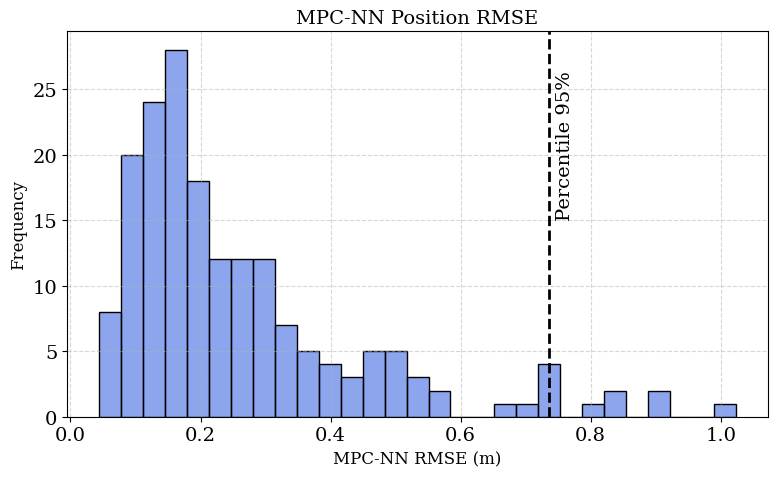

    trajectory_type  sim_id  perc_diff
191    lissajous_xy      18  -0.685157
377            line      44  -0.681809
425            line      92  -0.671446
177    lissajous_xy       4  -0.659765
487            line     154  -0.648108
..              ...     ...        ...
245    lissajous_xy      72   0.415477
355            line      22   0.429591
357            line      24   0.529598
479            line     146   0.546542
175    lissajous_xy       2   0.623947

[180 rows x 3 columns]


In [126]:
analyzer.plot_histogram_temp(df_rotor_failure, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_1rf.pdf')
print(df_rotor_failure.sort_values('perc_diff',ascending=True)[['trajectory_type','sim_id','perc_diff']])

percentile 0.95 = 0.0892047988438523


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mathe\AppData\Local\Temp\ipykernel_19668\1731570649.py:1: SyntaxWarning: invalid escape sequence '\D'
  analyzer.plot_histogram_temp(df_rotor_failure, 'delta_rmse', '$\\Delta$RMSE (m)', '$\Delta$RMSE Distribution', percentile=0.95,show_mean=False,save_name='delta_rmse_1rf.pdf')
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with l

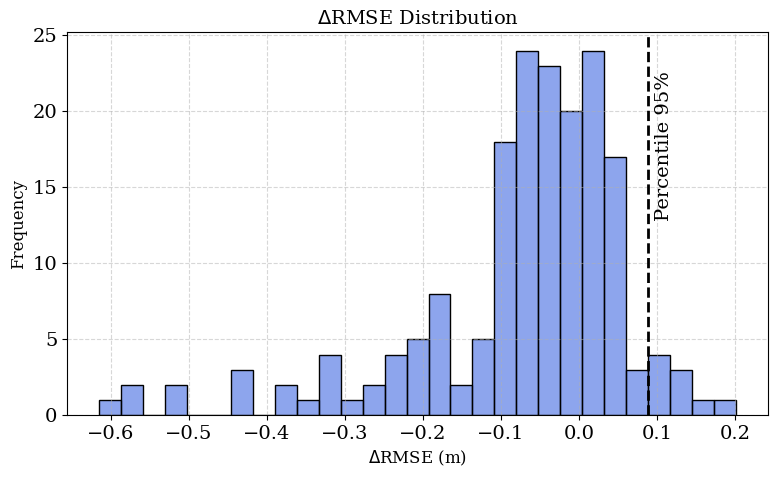

In [127]:
analyzer.plot_histogram_temp(df_rotor_failure, 'delta_rmse', '$\\Delta$RMSE (m)', '$\Delta$RMSE Distribution', percentile=0.95,show_mean=False,save_name='delta_rmse_1rf.pdf')

In [128]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'delta_rmse','delta_rmse')
stats_rmse

,Controller,min,max,mean,std
0,MPC,-0.615569,0.201693,-0.073904,0.138772
1,Neural Network,-0.615569,0.201693,-0.073904,0.138772


In [129]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.043684,1.02369,0.262181,0.191151
1,Neural Network,0.043684,1.02369,0.262181,0.191151


In [130]:
df_rotor_failure.sort_values('perc_diff')['trajectory_type']

191    lissajous_xy
377            line
425            line
177    lissajous_xy
487            line
           ...     
245    lissajous_xy
355            line
357            line
479            line
175    lissajous_xy
Name: trajectory_type, Length: 180, dtype: object

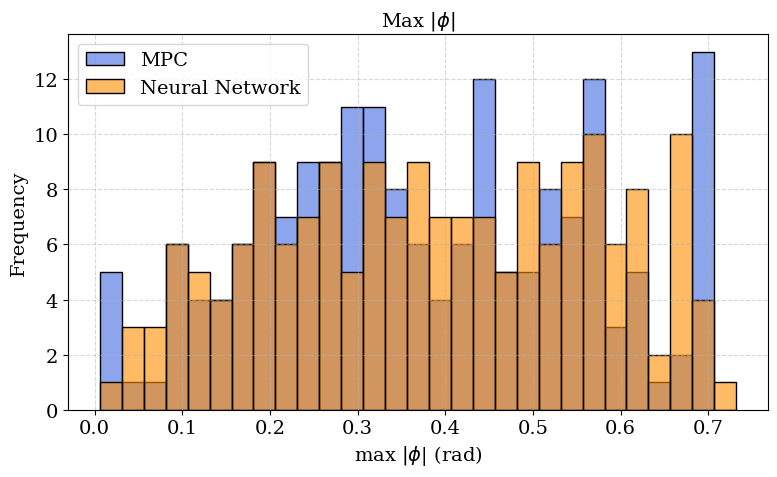

In [131]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

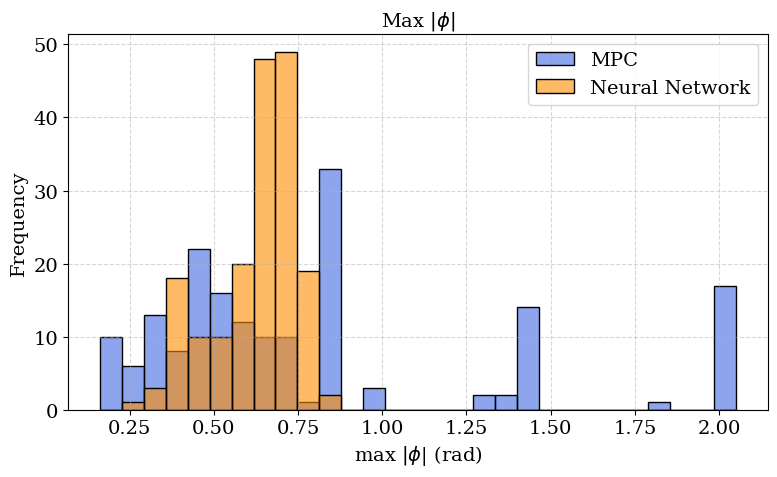

     sim_id  trajectory_id trajectory_type  mpc_max_abs_phi
353      20             10            line         2.050469
305     132             66    lissajous_xy         2.000969
375      42             21            line         2.000967
457     124             62            line         2.000734
191      18              9    lissajous_xy         2.000676
..      ...            ...             ...              ...
217      44             22    lissajous_xy         0.200969
203      30             15    lissajous_xy         0.192857
273     100             50    lissajous_xy         0.183930
383      50             25            line         0.175367
351      18              9            line         0.162216

[180 rows x 4 columns]


In [132]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)
print(df_rotor_failure.sort_values('mpc_max_abs_phi', ascending=False)[['sim_id','trajectory_id','trajectory_type','mpc_max_abs_phi']])

R²: 0.3652
R²: 0.3946


poly1d([0.62197815, 0.18895937])

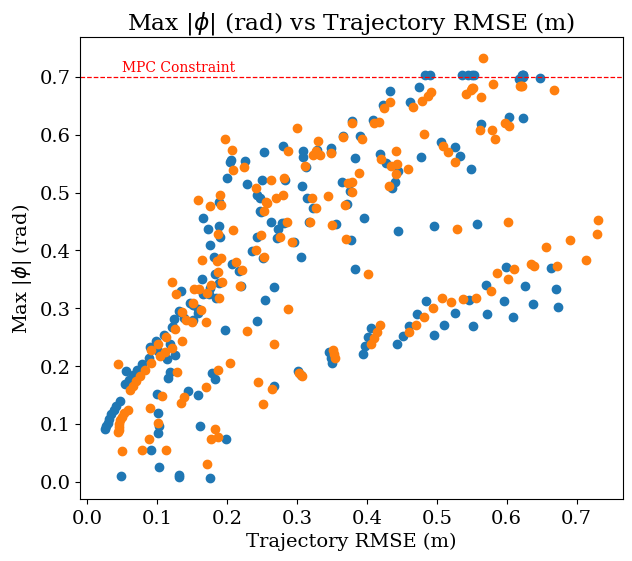

In [133]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_normal['mpc_RMSe'],df_normal['mpc_max_abs_phi'])
ax.scatter(df_normal['nn_RMSe'],df_normal['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.05, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_normal['mpc_RMSe'], df_normal['mpc_max_abs_phi'],1)
r2(df_normal['nn_RMSe'], df_normal['nn_max_abs_phi'],1)

R²: 0.1793
R²: 0.5083


poly1d([0.45859619, 0.45394786])

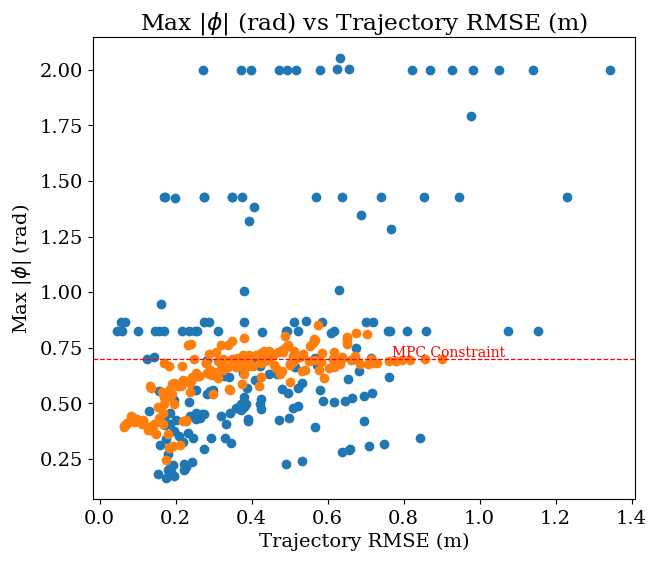

In [134]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_phi'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_phi'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_phi'],1)

R²: 0.5943
R²: 0.7171


poly1d([0.82505435, 0.13366305])

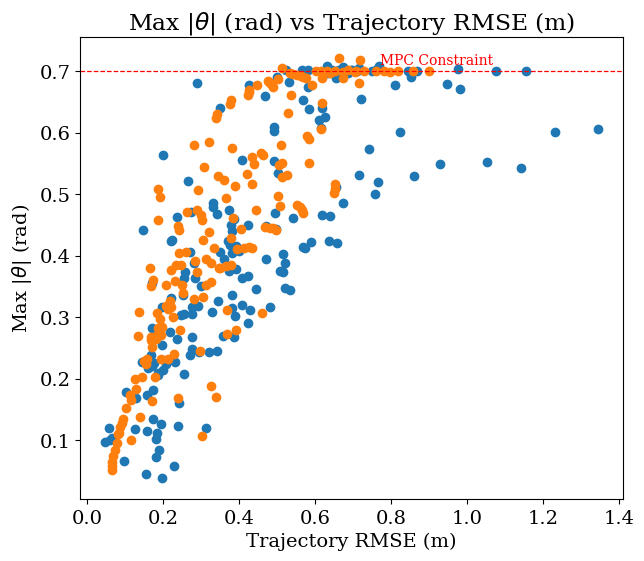

In [135]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_theta'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_theta'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\theta$| (rad)')
ax.set_title('Max |$\\theta$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_theta'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_theta'],1)

R²: 0.3274
R²: 0.5463


poly1d([0.58702538, 0.0420454 ])

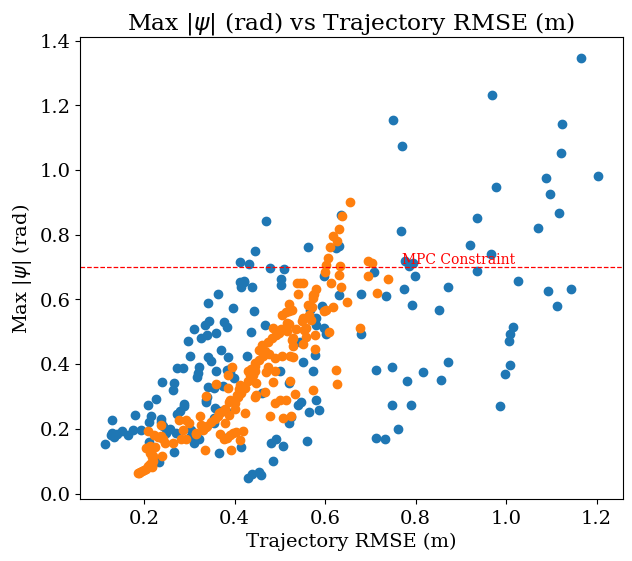

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter((df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])/3,df_rotor_failure['mpc_RMSe'])
ax.scatter((df_rotor_failure['nn_max_abs_phi'] + df_rotor_failure['nn_max_abs_theta'] + df_rotor_failure['nn_max_abs_psi'])/3,df_rotor_failure['nn_RMSe'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\alpha$| (rad)')
ax.set_title('Max |$\\alpha$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'],(df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])/3,1)
r2(df_rotor_failure['mpc_RMSe'],(df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])/3,1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'],1)

R²: 0.3274
R²: 0.5463


poly1d([0.58702538, 0.0420454 ])

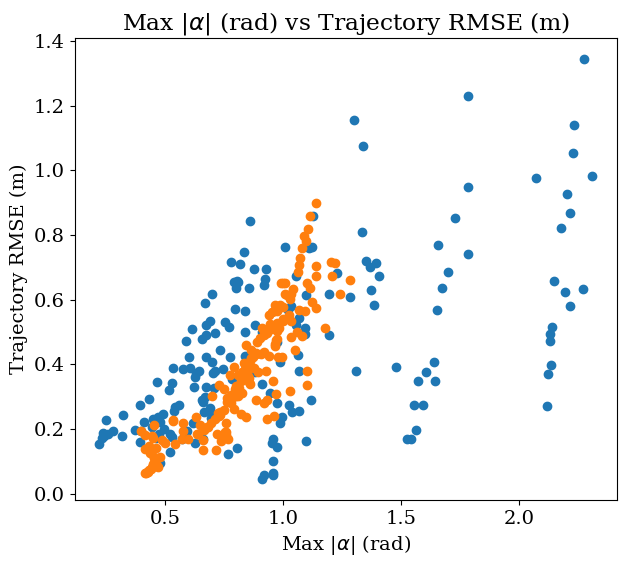

In [182]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(((df_rotor_failure['mpc_max_abs_phi']**2 + df_rotor_failure['mpc_max_abs_theta']**2 + df_rotor_failure['mpc_max_abs_psi']**2)**0.5),df_rotor_failure['mpc_RMSe'])
ax.scatter(((df_rotor_failure['nn_max_abs_phi']**2 + df_rotor_failure['nn_max_abs_theta']**2 + df_rotor_failure['nn_max_abs_psi']**2)**0.5),df_rotor_failure['nn_RMSe'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\alpha$| (rad)')
ax.set_title('Max |$\\alpha$| (rad) vs Trajectory RMSE (m)')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_psi'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'],1)

R²: 0.2644


Text(0.77, 0.71, 'MPC Constraint')

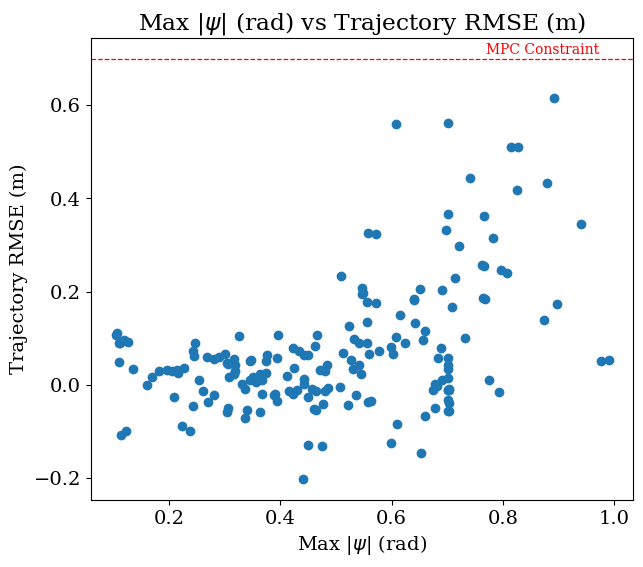

In [137]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

model = r2(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1), df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'], 2)

#Normal
ax.scatter(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'])
#ax.plot(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),model(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)


R²: 0.6312


Text(0.5, 1.0, 'Max |$\\psi$| (rad) vs Trajectory RMSE (m)')

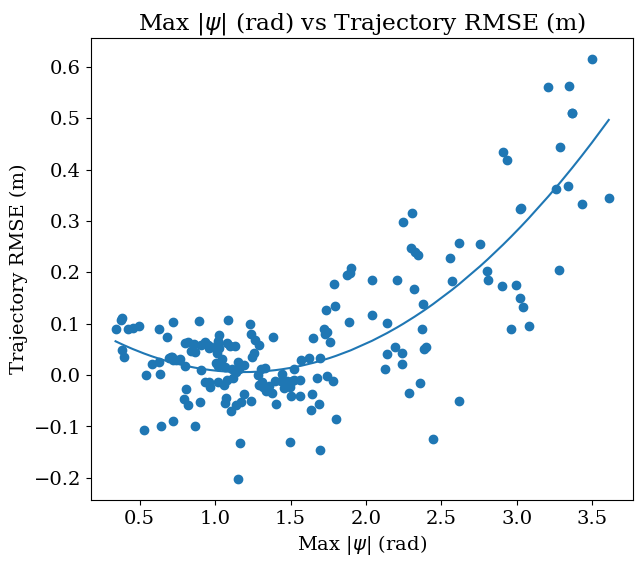

In [138]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#df_rotor_failure['alpha'] = np.max(df_rotor_failure[['mpc_max_abs_phi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)
df_rotor_failure['alpha'] = df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi']
temp = df_rotor_failure.sort_values('alpha',ascending=True)
#temp = temp[temp['period (s)'] > 0]
x = temp['alpha']
y = temp['mpc_RMSe'] - temp['nn_RMSe']

model = r2(x,y,2)

#Normal
ax.scatter(x,y)
ax.plot(x, model(x))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

R²: 0.4810


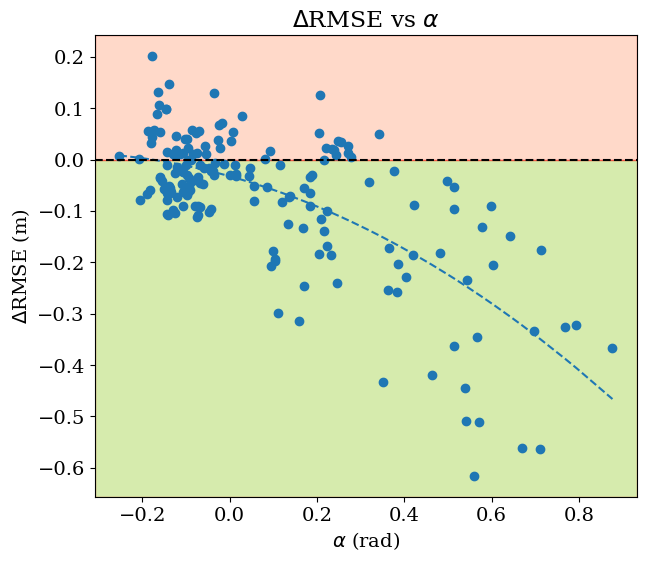

In [180]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#df_rotor_failure['alpha'] = np.max(df_rotor_failure[['mpc_max_abs_phi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)
df_rotor_failure['alpha'] = (df_rotor_failure['mpc_max_abs_phi'] - df_rotor_failure['nn_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] -df_rotor_failure['nn_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'] - df_rotor_failure['nn_max_abs_psi'])/3
temp = df_rotor_failure.sort_values('alpha',ascending=True)
#temp = temp[temp['period (s)'] > 0]
x = temp['alpha']
y = - temp['mpc_RMSe'] + temp['nn_RMSe']

model = r2(x,y,2)

#Normal
ax.scatter(x,y)
ax.plot(x, model(x),'--')
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('$\\Delta$RMSE (m)')
ax.set_xlabel('$\\alpha$ (rad)')
ax.set_title('$\\Delta$RMSE vs $\\alpha$')
x_plot_min, x_plot_max = plt.xlim()
y_plot_min, y_plot_max = plt.ylim()
rect = patches.Rectangle((x_plot_min, 0), (x_plot_max - x_plot_min), (y_plot_max - 0), linewidth=1, edgecolor='r', facecolor='lightsalmon', alpha=0.4, zorder=0)
rect2 = patches.Rectangle((x_plot_min, y_plot_min), (x_plot_max - x_plot_min), (0 - y_plot_min), linewidth=1, edgecolor='r', facecolor='yellowgreen', alpha=0.4, zorder=0)
ax.add_patch(rect)
ax.add_patch(rect2)
ax.axhline(0,linestyle='--',color='black')

fig.savefig('plots/delta_rmse_alpha.pdf', bbox_inches = 'tight')
#ax.text(x_plot_min + 0.1*(x_plot_max-x_plot_min),y_plot_max - 0.9*(y_plot_max-y_plot_min),'TRMSE$_{NN}$ < TRMSE$_{MPC}$',fontsize=10)
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

R²: 0.4821


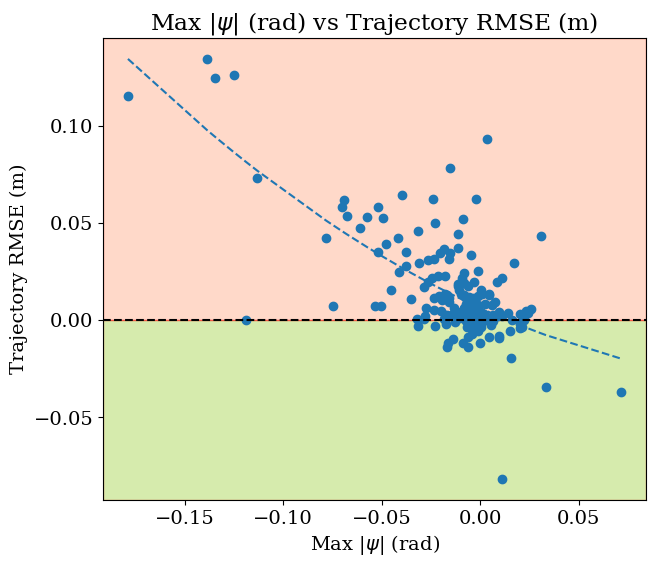

In [155]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#df_rotor_failure['alpha'] = np.max(df_rotor_failure[['mpc_max_abs_phi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)
df_normal['alpha'] = (df_normal['mpc_max_abs_phi'] - df_normal['nn_max_abs_phi'] + df_normal['mpc_max_abs_theta'] -df_normal['nn_max_abs_theta'] + df_normal['mpc_max_abs_psi'] - df_normal['nn_max_abs_psi'])/3
temp = df_normal.sort_values('alpha',ascending=True)
#temp = temp[temp['period (s)'] > 0]
x = temp['alpha']
y = -temp['mpc_RMSe'] + temp['nn_RMSe']

model = r2(x,y,2)

#Normal
ax.scatter(x,y)
ax.plot(x, model(x),'--')
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
x_plot_min, x_plot_max = plt.xlim()
y_plot_min, y_plot_max = plt.ylim()
rect = patches.Rectangle((x_plot_min, 0), (x_plot_max - x_plot_min), (y_plot_max - 0), linewidth=1, edgecolor='r', facecolor='lightsalmon', alpha=0.4, zorder=0)
rect2 = patches.Rectangle((x_plot_min, y_plot_min), (x_plot_max - x_plot_min), (0 - y_plot_min), linewidth=1, edgecolor='r', facecolor='yellowgreen', alpha=0.4, zorder=0)
ax.add_patch(rect)
ax.add_patch(rect2)
ax.axhline(0,linestyle='--',color='black')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

In [140]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

model = r2(x,y,2)

x_mpc = (df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])/3


#Normal
ax.scatter(df_rotor_failure[],y)
ax.plot(x, model(x))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2483816604.py, line 9)

In [ ]:

#r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'])

In [ ]:
print(df_rotor_failure.sort_values('nn_max_abs_phi',ascending=False)[['trajectory_type','nn_max_abs_phi', 'radius (m)', 'period (s)']])

    trajectory_type  nn_max_abs_phi  radius (m)  period (s)
75        circle_xy        0.850217         5.0        11.0
77        circle_xy        0.817255         5.5        11.0
55        circle_xy        0.811978         5.0        10.0
95        circle_xy        0.801708         5.0        12.0
321    lissajous_xy        0.799843         7.5        11.0
..              ...             ...         ...         ...
191    lissajous_xy        0.361955         1.0         5.5
373            line        0.312744         NaN         NaN
343            line        0.309368         NaN         NaN
371            line        0.300024         NaN         NaN
383            line        0.246013         NaN         NaN

[180 rows x 4 columns]


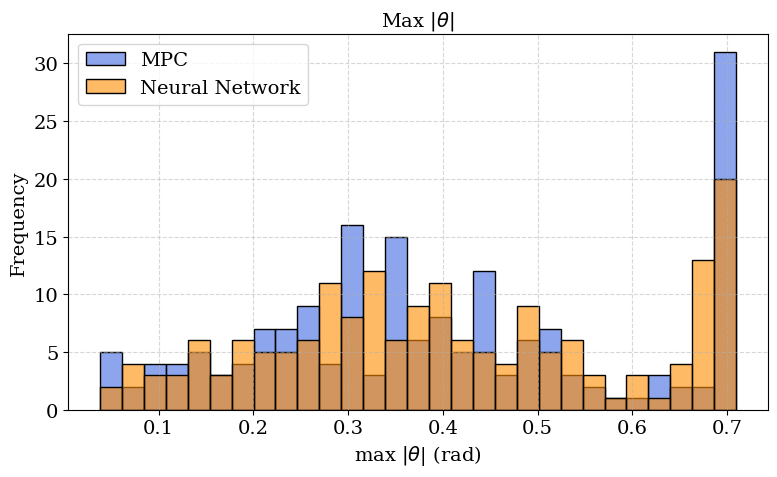

In [ ]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

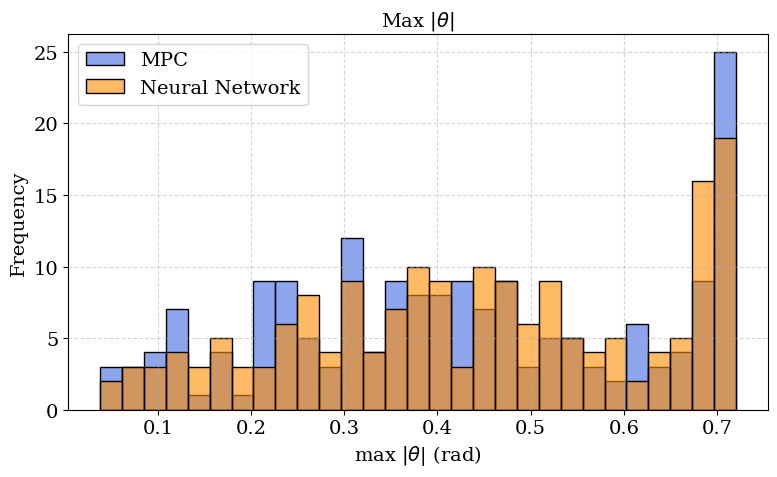

In [ ]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

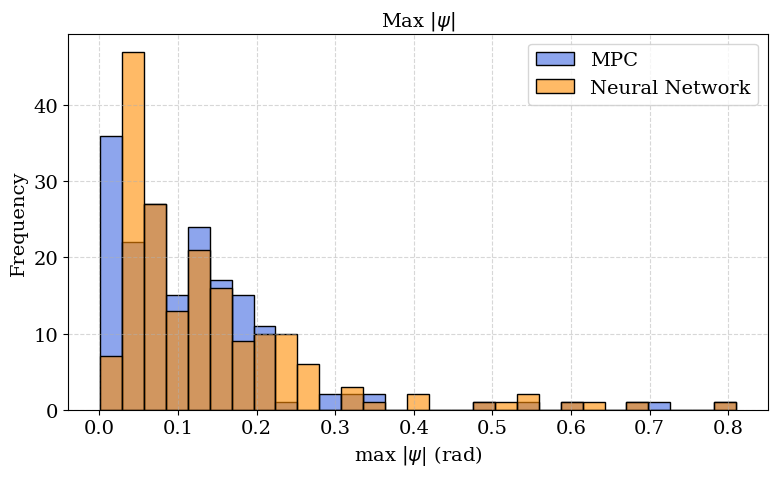

In [ ]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

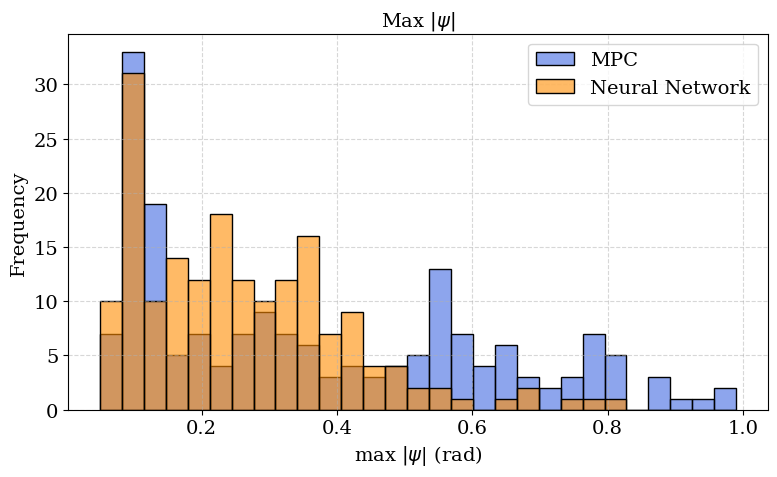

In [ ]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [ ]:
print('maximum nn RMSEs')
df_total.sort_values('nn_RMSe',ascending=False)[['sim_id','trajectory_type','radius (m)', 'period (s)', 'nn_RMSe']]

maximum nn RMSEs


,sim_id,trajectory_type,radius (m),period (s),nn_RMSe
29,30,circle_xy,6.0,5.0,11.354645
11,12,circle_xy,6.0,2.0,8.565772
10,11,circle_xy,6.0,2.0,7.505141
4,5,circle_xy,6.0,1.0,7.193703
5,6,circle_xy,6.0,1.0,7.092499
...,...,...,...,...,...
258,85,lissajous_xy,0.5,8.0,0.045021
244,71,lissajous_xy,0.5,7.5,0.044897
272,99,lissajous_xy,0.5,8.5,0.044110
424,91,line,NaN,NaN,0.043903


In [ ]:
print('cases where nn_RMSE < mpc_RMSE')
df_nn_lower_than_mpc = df_total[df_total['nn_RMSe'] < df_total['mpc_RMSe']]
print('number of cases:',len(df_nn_lower_than_mpc))
print(df_nn_lower_than_mpc.groupby(['trajectory_type','operation_mode']).count()['nn_RMSe'])

cases where nn_RMSE < mpc_RMSE
number of cases: 209
trajectory_type  operation_mode
circle_xy        normal             9
                 total_failure     42
line             normal            22
                 total_failure     39
lissajous_xy     normal            25
                 total_failure     72
Name: nn_RMSe, dtype: int64


In [ ]:
df_rotor_failure.sort_values('mpc_max_abs_phi',ascending=False)[['trajectory_type','operation_mode','mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe']].head(20)

,trajectory_type,operation_mode,mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe
353,line,total_failure,2.050469,0.543990,0.632757,0.299604
305,lissajous_xy,total_failure,2.000969,0.769947,0.656234,0.560726
375,line,total_failure,2.000967,0.578330,0.625082,0.420002
457,line,total_failure,2.000734,0.666602,0.270973,0.181510
191,lissajous_xy,total_failure,2.000676,0.361955,0.470927,0.148268
377,line,total_failure,2.000531,0.624203,0.822110,0.261588
253,lissajous_xy,total_failure,2.000508,0.620311,0.398700,0.249088
487,line,total_failure,2.000505,0.630796,0.868440,0.305597
177,lissajous_xy,total_failure,2.000477,0.405586,0.492907,0.167704
51,circle_xy,total_failure,2.000430,0.708388,0.981980,0.637390


In [ ]:
df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] > 0.7].groupby('trajectory_type').count()
#print(len(df_normal),len(df_rotor_failure))

,sim_id,trajectory_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,...,global_id,perc_diff,nn_max_abs_phi,mpc_max_abs_phi,nn_max_abs_theta,mpc_max_abs_theta,nn_max_abs_psi,mpc_max_abs_psi,delta_rmse,alpha
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
line,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
lissajous_xy,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [ ]:
# Trajetorias com baixo perc_diff
df_rotor_failure[df_rotor_failure['trajectory_type'] == 'circle_xy'].sort_values('inter_position_RMSe',ascending=True)[['sim_id','trajectory_type','period (s)','radius (m)', 'mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe','global_id']]

,sim_id,trajectory_type,period (s),radius (m),mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe,global_id
137,138,circle_xy,14.0,5.5,0.474726,0.682703,0.424858,0.424232,circle_xy69
163,164,circle_xy,15.0,7.0,0.488944,0.646892,0.522308,0.533360,circle_xy82
95,96,circle_xy,12.0,5.0,0.435947,0.801708,0.499621,0.488631,circle_xy48
119,120,circle_xy,13.0,6.0,0.392896,0.689845,0.565672,0.551377,circle_xy60
115,116,circle_xy,13.0,5.0,0.225300,0.711371,0.490197,0.423140,circle_xy58
161,162,circle_xy,15.0,6.5,0.241966,0.632506,0.531368,0.474134,circle_xy81
77,78,circle_xy,11.0,5.5,0.523033,0.817255,0.663177,0.674058,circle_xy39
167,168,circle_xy,15.0,8.0,0.509239,0.674950,0.644972,0.684882,circle_xy84
55,56,circle_xy,10.0,5.0,0.530856,0.811978,0.695039,0.704685,circle_xy28
143,144,circle_xy,14.0,7.0,0.293210,0.663633,0.658340,0.616011,circle_xy72


In [ ]:
df_normal[df_normal['global_id'] == 'circle_xy80'][['sim_id']]

,sim_id
158,159


In [ ]:
df_first_mpc_rmse = df_rotor_failure.sort_values(['mpc_RMSe','mpc_max_abs_phi'],ascending=[False,False])[['sim_id','trajectory_type','mpc_max_abs_phi','period (s)', 'radius (m)','mpc_RMSe','mpc_max_abs_phi']]
df_first_mpc_rmse.head(15)

,sim_id,trajectory_type,mpc_max_abs_phi,period (s),radius (m),mpc_RMSe,mpc_max_abs_phi
123,124,circle_xy,2.000345,13.0,7.0,1.344652,2.000345
79,80,circle_xy,1.428884,11.0,6.0,1.230478,1.428884
125,126,circle_xy,0.826927,13.0,7.5,1.155114,0.826927
121,122,circle_xy,2.000370,13.0,6.5,1.140988,2.000370
101,102,circle_xy,0.826933,12.0,6.5,1.075623,0.826933
141,142,circle_xy,2.000273,14.0,6.5,1.051972,2.000273
51,52,circle_xy,2.000430,9.0,5.0,0.981980,2.000430
359,26,line,1.792200,NaN,NaN,0.976592,1.792200
183,10,lissajous_xy,1.429696,5.0,2.5,0.947113,1.429696
117,118,circle_xy,2.000349,13.0,5.5,0.927245,2.000349
